In [1]:
# Importando pacotes
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import statsmodels.api as sm

In [2]:
# Definindo tamanho dos gráficos
plt.rcParams['figure.figsize'] = [8,6]

In [3]:
# Lendo base de dados
pkgdir = 'C:/Users/Luna/MBA_USP/data/'

dados = pd.read_csv(pkgdir + 'DailyDelhiClimateTrain.csv',index_col=0,parse_dates=True)
dados.head()

meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [4]:
# Arrumando index (datas)
idx1 = pd.date_range(start=dados.index.min(), end=dados.index.max(), freq='D')
dados = dados.reindex(idx1)
# Completando dados faltantes (se precisar)
dados.fillna(method='ffill', inplace=True)
dados.head()

meantemp   humidity  wind_speed  meanpressure
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000

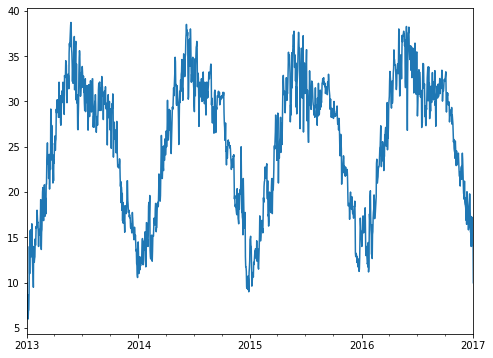

In [5]:
# Visualizando variável de interesse
dados.meantemp.plot()

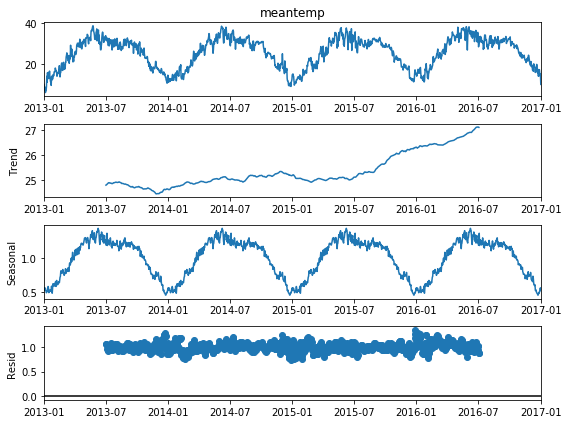

In [6]:
# Decompondo a série - Multiplicativo
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dados['meantemp'], model='multiplicative', period=365)  # model='add' also works
result.plot();

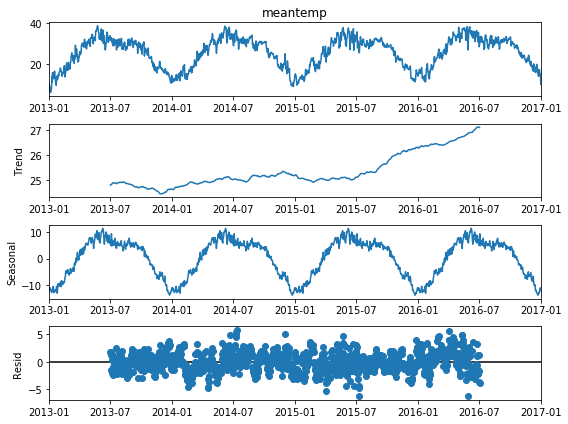

In [7]:
# Decompondo a série - Aditivo
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dados['meantemp'], model='additive', period=365)  # model='add' also works
result.plot();

In [8]:
# Teste de estacionaridade para série bruta
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff

result = adfuller(dados['meantemp'], autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.021069
p-value: 0.277412
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [9]:
# Teste de estacionaridade para primeira diferença da série
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.tools import diff

result = adfuller(diff(dados['meantemp']), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))


ADF Statistic: -16.378720
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


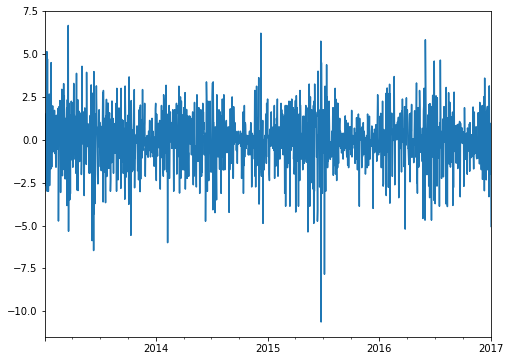

In [10]:
# Visualização da primeira diferença
diff(dados.meantemp).plot()

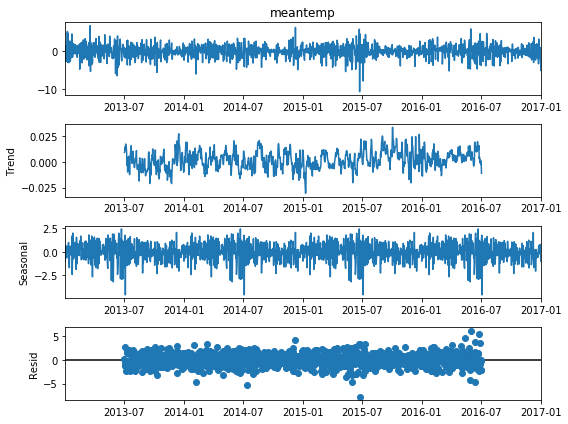

In [11]:
# Decompondo a primeira diferença
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diff(dados.meantemp), model='additive',period=365)  # model='add' also works
result.plot();

In [12]:
# Importando pacotes necessários
import statsmodels as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

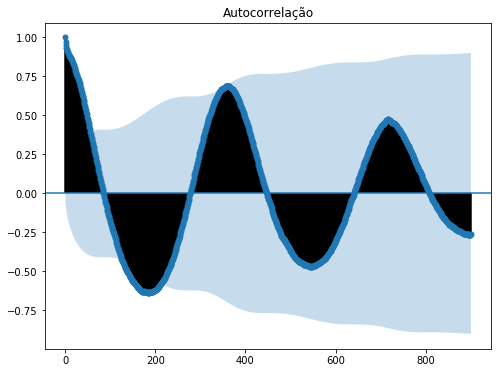

In [13]:
# Autocorrelação 
title = 'Autocorrelação'
lags = 900
plot_acf(dados['meantemp'],title=title,lags=lags);
plt.show();

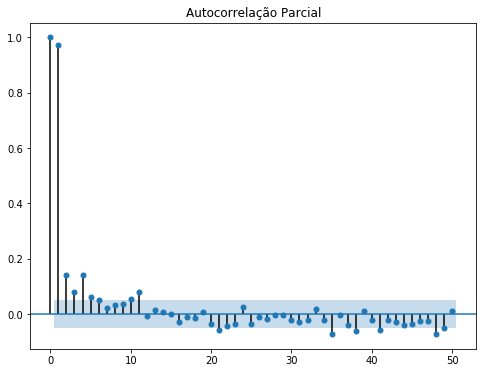

In [16]:
# Autocorrelação Parcial
title = 'Autocorrelação Parcial'
lags = 50
plot_pacf(dados['meantemp'],title=title,lags=lags);
plt.show();

In [15]:
# Funções específicas para a modelagem e previsão
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # para determinar (p,q)
from pmdarima import auto_arima # Para determinar a ordem do ARIMA


In [59]:
# Escolhendo o melhor modelo 
stepwise_fit = auto_arima(dados['meantemp'], start_p=0, start_q=0,
                          max_p=10, max_q=8,
                          seasonal=True, trace=True,
                          error_action='ignore',   
                          suppress_warnings=True,  
                          stepwise=True)           

stepwise_fit.summary()

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=5650.181, BIC=5660.755, Time=0.140 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=5614.068, BIC=5629.929, Time=0.314 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=5602.114, BIC=5617.974, Time=0.444 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=5648.181, BIC=5653.468, Time=0.105 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=5544.460, BIC=5565.607, Time=1.732 seconds
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=5546.100, BIC=5572.534, Time=1.536 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=5546.168, BIC=5572.602, Time=0.653 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=5573.723, BIC=5594.871, Time=0.536 seconds
Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=5600.849, BIC=5621.997, Time=0.655 seconds
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=5546.314, BIC=5578.035, Time=3.647 seconds
Total fit time: 9.794 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1462
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2768.230
Date:                Thu, 06 Aug 2020   AIC                           5544.460
Time:                        21:34:11   BIC                           5565.607
Sample:                             0   HQIC                          5552.349
                               - 1462                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0011      0.009      0.130      0.896      -0.016       0.018
ar.L1          0.5728      0.046     12.496      0.000       0.483       0.663
ma.L1         -0.8028      0.036    -22.069      0.000      -0.874      -0.732
sigma2         2.5895      0.073     35.312      0.000       2.446       2.733
===================================================================================
Ljung-Box (Q):                       70.52   Jarque-Bera (JB):               255.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.46
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""